# EDA Project 1

## Stakeholder
**Erin Robinson** 
- Buyer 
- Invest in poor neighbourhood, buying & selling, costs back + little profit 
- socially responsible

***subtitle***

## Table of Contents
0. Set-up
1. Exploring the data set
2. Building hypotheses
3. Testing hypotheses & building a model
4. Visualizing results
5. Drawing conclusions

### 0. Set-up

***Preparing data frame(s) and making data accessible / Clean-up***

---

In [204]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import seaborn as sns


# plotting by states -- not yet functional !!!
import plotly.figure_factory as ff

In [50]:
# create main data frame
df = pd.read_csv('../Data/King_County_House_prices_dataset.csv')

As our stakeholder is interested to invest in **poor neighborhoods**, it appears reasonable to supplement our data set through domain knowledge:

In [48]:
# supplemetary data
# source: http://www.zipatlas.com/us/wa/zip-code-comparison/median-household-income.htm, viewed on 15.12.2021, 17:00
median_income_by_zip = pd.read_csv('../Data/state-geocodes-v2013.csv', sep=';')
median_income_by_zip.head()

,id,zipcode,Location,City,Population,median_income,National Rank
0,1,98039,47626035 -122233707,Medina Washington,3050,132665,#46
1,2,98053,47655058 -122025817,Redmond Washington,31203,96028,#335
2,3,98364,47855439 -122595728,Port Gamble Washington,102,94366,#364
3,4,98040,47562356 -122226514,Mercer Island Washington,22036,91904,#415
4,5,98029,47578444 -122013924,Issaquah Washington,28427,91146,#430


In [38]:
# add supplementary data to dataframe
df = pd.merge(df, median_income_by_zip[['zipcode', 'median_income']], on='zipcode')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,median_income
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,47461
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,47461
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,47461
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,1300,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,47461
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,47461


In [79]:
grade_rel = df[['id', 'grade']].groupby('grade').count().reset_index()
grade_rel['grade_rel'] = grade_rel.id / grade_rel.id.sum()
grade_rel

,grade,id,grade_rel
0,3,1,0.000046
1,4,27,0.001250
2,5,242,0.011205
3,6,2038,0.094365
4,7,8974,0.415521
5,8,6065,0.280826
6,9,2615,0.121082
7,10,1134,0.052507
8,11,399,0.018475
9,12,89,0.004121


In [78]:
cond_rel = df[['id', 'condition']].groupby('condition').count().reset_index()
cond_rel['cond_rel'] = cond_rel.id / cond_rel.id.sum()
cond_rel

,condition,id,cond_rel
0,1,29,0.001343
1,2,170,0.007871
2,3,14020,0.649164
3,4,5677,0.262861
4,5,1701,0.078761


In [212]:
# Assign pricing brakets to the data set
# 1 = < 100,000
# 2 = 100,000 - 150,000
# 3 = 150,000 - 200,000
# 4 = 200,000 - 250,000
# 5 = 250,000 - 300,000
# 6 = 300,000 - 350,000
# 7 = 350,000 - 400,000
# 8 = 400,000 - 450,000
# 9 = 450,000 - 500,000
# 10 = > 500,000 

brackets = {100000: '< 100,000',         150000: '100,000 - 150,000',
            200000: '150,000 - 200,000', 250000: '200,000 - 250,000',
            300000: '250,000 - 300,000', 350000: '300,000 - 350,000',
            400000: '350,000 - 400,000', 450000: '400,000 - 450,000',
            500000: '450,000 - 500,000', df.price.max()+1: '> 500,000'}

def find_category(price, brackets):
    for b in brackets.keys():
        if price < b:
            return brackets[b]
        
# add price category column to data frame
df['price_category'] = df.price.apply(lambda x: find_category(x, brackets))

In [ ]:
# dissect 'date' column


As the data frame is now prepared and cleaned up, we can move to the next step: exploring the data to extract first information and build our hypotheses.

<pre></pre>


### 1. Exploring the data set & first visualizations

The aim at this point is to get a better feeling for our data set and extract first relevant information regarding the overall goal of our stakeholder. At first we will have a look at all variables, their stats and definitions:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20343 entries, 0 to 20342
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20343 non-null  int64  
 1   date           20343 non-null  object 
 2   price          20343 non-null  float64
 3   bedrooms       20343 non-null  int64  
 4   bathrooms      20343 non-null  float64
 5   sqft_living    20343 non-null  int64  
 6   sqft_lot       20343 non-null  int64  
 7   floors         20343 non-null  float64
 8   waterfront     18103 non-null  float64
 9   view           20281 non-null  float64
 10  condition      20343 non-null  int64  
 11  grade          20343 non-null  int64  
 12  sqft_above     20343 non-null  int64  
 13  sqft_basement  20343 non-null  object 
 14  yr_built       20343 non-null  int64  
 15  yr_renovated   16724 non-null  float64
 16  zipcode        20343 non-null  int64  
 17  lat            20343 non-null  float64
 18  long  

<pre></pre>

***Variables explained***

---
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  # of bedrooms
* **bathroomsNumber** - # of bathrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

<pre></pre>

***Exploring several data columns***

---

Condition and grade seem to be a good link to gaging an objects quality.

AttributeError: 'DataFrame' object has no attribute 'cond_rel'

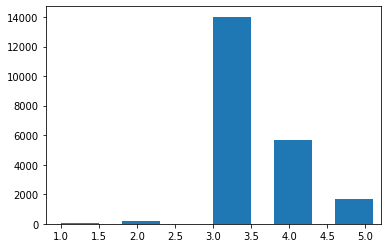

In [97]:
plt.hist(df.condition, width = 0.5)
plt.hist(df.cond_rel);

<AxesSubplot:xlabel='condition', ylabel='Count'>

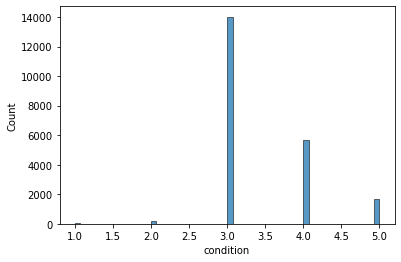

In [94]:
sns.histplot(data=df, x='condition')

> Very few objects are in a rather dire condition (1-2)

''

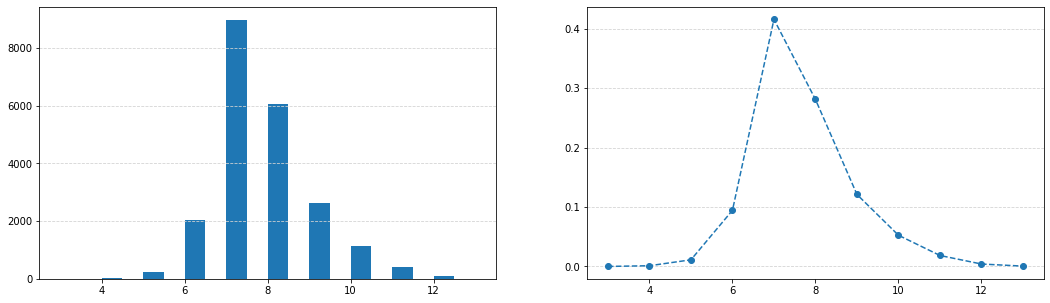

In [143]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.hist(df.grade, width=0.5)

plt.grid(axis='y',
         color='lightgrey',
         linestyle='--'
        )

# the histogram of the data
plt.subplot(1,2,2)
plt.plot(grade_rel.grade, 
         grade_rel.grade_rel,
         marker='o', 
         linestyle='--'
        )
plt.grid(axis='y',
         color='lightgrey',
         linestyle='--'
        )
;

''

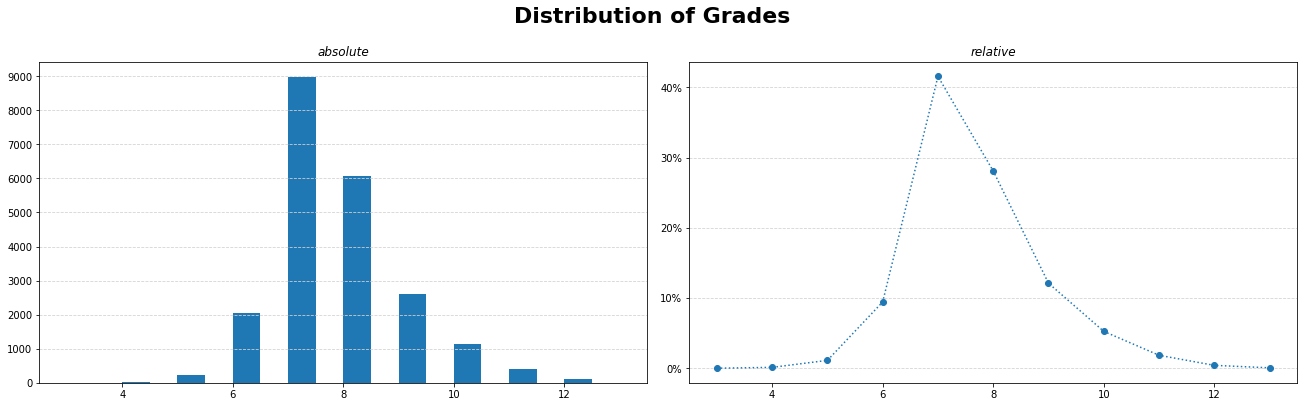

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5), constrained_layout=True)
fig.suptitle('Distribution of Grades',
             y=1.1,
             fontsize=22,
             fontweight='bold'
            )

ax1.hist(df.grade, width=0.5)
ax1.set_title('absolute',
             style='italic'
             )
ax1.grid(axis='y',
         color='lightgrey',
         linestyle='--'
        )
ax1.yaxis.set_ticks(np.arange(0,10000,1000))

ax2.plot(grade_rel.grade, 
         grade_rel.grade_rel,
         marker='o', 
         linestyle=':'
        )
ax2.set_title('relative', 
              style='italic'
             )
ax2.grid(axis='y',
         color='lightgrey',
         linestyle='--'
        )
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
;

> Most houses in the data set have a condition between 7 and 9



In [ ]:
df.price.describe()

In [ ]:
plt.scatter(df.id, df.price)

In [ ]:
# investigate geo data
df_sample = df[df['STNAME'] == 'Florida']

values = df_sample_r['price'].tolist()
fips = df_sample_r['zipcodes'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Washington'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Population by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

In [ ]:
fig = px.scatter_geo(df, lat=df.lat, lon=df.long, color=df.grade)#, hover_name="city") #, color='state'
fig.update_layout(title = 'Real Estate', geo_scope='usa')
#fig.update_geos(fitbounds='locations')
fig.show()

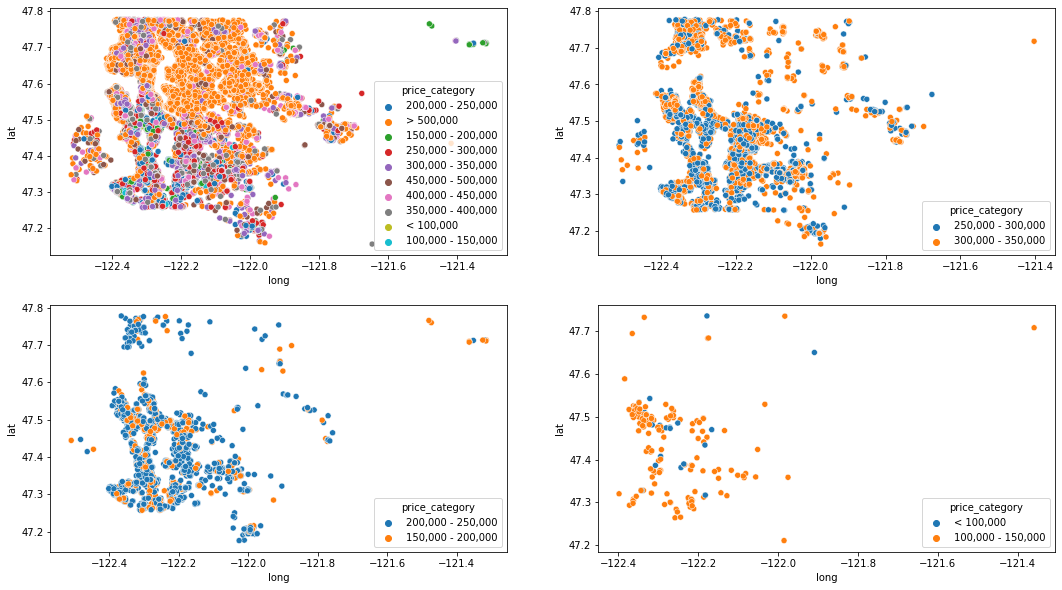

In [231]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))

fig = sns.scatterplot(x="long", y="lat", 
                      hue='price_category', 
                      data=df,
                      ax=axes[0, 0]
                     )
fig = sns.scatterplot(x="long", y="lat", 
                      hue='price_category', 
                      data=df.query('price < 350000 & price > 250000'),
                      ax=axes[0, 1]
                     )
fig = sns.scatterplot(x="long", y="lat", 
                      hue='price_category', 
                      data=df.query('price < 250000 & price > 150000'),
                      ax=axes[1, 0]
                     )
fig = sns.scatterplot(x="long", y="lat", 
                      hue='price_category', 
                      data=df.query('price < 150000'),
                      ax=axes[1,1]
                     )

In [ ]:
df2 = df.query('price < 350000 & price > 250000')
df.loc[df.price_category == '< 100,000', 'long']

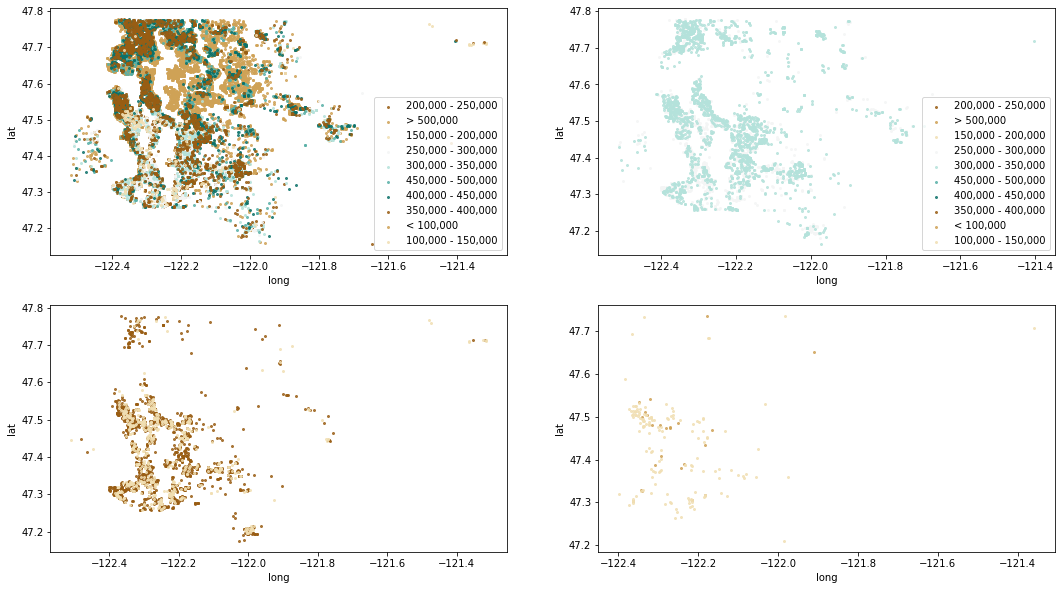

In [282]:
import itertools
    
#data = {'source':['B1','B1','B1','C2','C2','C2'],
 #       'depth':[1,4,9,1,3,10],
  #      'value':[10,4,23,78,24,45]}

#df = pd.DataFrame(data)

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(18,10))

# set palette 
palette = itertools.cycle(sns.color_palette("BrBG", 7))
df2 = df.query('price < 350000 & price > 250000')
df3 = df.query('price < 250000 & price > 150000')
df4 = df.query('price < 150000')

# plotting 
for source in df['price_category'].unique():
    x = df.loc[df['price_category'] == source, 'long']
    y = df.loc[df['price_category'] == source, 'lat']
    x2 = df2.loc[df2['price_category'] == source, 'long']
    y2 = df2.loc[df2['price_category'] == source, 'lat']
    x3 = df3.loc[df3['price_category'] == source, 'long']
    y3 = df3.loc[df3['price_category'] == source, 'lat']
    x4 = df4.loc[df4['price_category'] == source, 'long']
    y4 = df4.loc[df4['price_category'] == source, 'lat']
    
    # color
    c = next(palette)
    sns.regplot(x,
                y,
                scatter = True,
                fit_reg = False,
                label = source,
                ax = ax1,
                color=c, scatter_kws={'s':4})
    ax1.legend()
    sns.regplot(x2,
                y2,
                scatter = True,
                fit_reg = False,
                label = source,
                ax = ax2,
                color=c, scatter_kws={'s':4})
    
    ax2.legend()
    sns.regplot(x3,
                y3,
                scatter = True,
                fit_reg = False,
                label = source,
                ax = ax3,
                color=c, scatter_kws={'s':4})
    sns.regplot(x4,
                y4,
                scatter = True,
                fit_reg = False,
                label = source,
                ax = ax4,
                color=c, scatter_kws={'s':4})
    #ax2.relim()
    ax2.autoscale_view()

plt.show()

***Remarks regarding stakeholder***
As Mrs. Robinson, also "stakeholder", is interested in buying and selling houses in poor neighbourhoods, the following will be done regarding the available data:

- dateDate: only 
- **condition**: assumption that 1 is worst condition, 5 is best
- **grade**: assumption grades 3-6 belong to poor neighborhoods
- **waterfront**: assumption that poor neighborhoods do not have access to a waterfront

### 2. Building hypotheses

---

- price and number of bedrooms correlate
- poor neighborhoods have lower grades
- lot size is smaller in poor neighborhoods
- 

## Additional install requirements

- plotly-geo
- geopandas==0.3.0
- pyshp==1.2.10
- shapely==1.6.3